<a href="https://colab.research.google.com/github/jmrojas2332/advanced-os-coursework/blob/master/Jose_HW1p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
# Import Boston Data set:
from sklearn.datasets import load_boston

(a) Use the Boston data set from Homework 0 to create a
          training set. Recall the 'label' of each point in this data set is
          the target value, namely the median value of owner occupied
          homes. Let $M$ be the average value of the target value over
          the entire data set.  Compute $M$.

In [0]:
boston = load_boston()
M = 0
for med_v in boston.target:
  M += med_v
M /= boston.data.shape[0]

(b) The goal is to build a decision tree that, based
          on the other features in the set, predicts whether the
          target value will be greater than or equal to $M$ (or less
          than $M$).  So, this is a classification problem.   Using
          any tree-based methods in the scikit-learn library, build a
          decision tree and report its error using 10-fold cross
          accuracy.  For full credit your cross-validated accuracy
          must be at least $70\%$.  Vary the depth of your
          decision tree and plot its cross-validated accuracy (as a
          function of the depth). Please use depth = $1, 2, \dots, 10$.

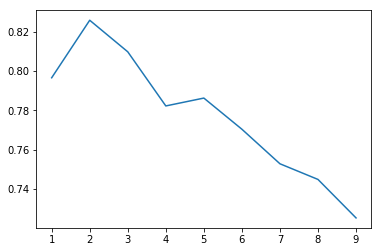

In [3]:
decision_tree_cv_scores = []
labels = [1 if t >= M else 0 for t in boston.target]

for depth in range(1, 10):
  decision_tree = tree.DecisionTreeClassifier(max_depth=depth)
  #decision_tree = decision_tree.fit(boston.data, labels)
  avg_cv_score = np.mean(cross_val_score(decision_tree, boston.data, labels, cv=10))
  decision_tree_cv_scores.append(avg_cv_score)
 
ax = plt.plot(range(1, 10), decision_tree_cv_scores)
plt.show()

(c) Now try the random forest classifier of the
          scikit-learn library and use the best depth you get from (b) as
          $max\_depth$. Vary the number of trees in the forest via the parameter
          $n\_estimators$ and plot its cross-validated accuracy (use $n\_estimators = 1, 2, \dots, 20$). Do you
          see an improvement using random forests versus using a single tree (Note: set $n\_estimators=1$ to see the result for a single tree instead of using the result in (b))?

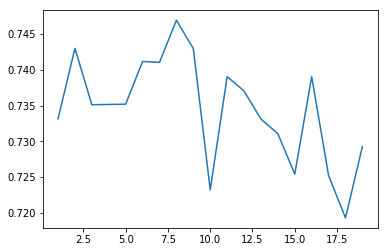

In [4]:
depth = np.argmax(decision_tree_cv_scores) + 1 # adding 1 since array index starts at 0 but depth starts at 1
random_forest_cv_scores = []

for estimators in range(1, 20):
  random_forest = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth)
  #random_forest = random_forest.fit(boston.data, labels)
  avg_cv_score = np.mean(cross_val_score(decision_tree, boston.data, labels, cv=10))
  random_forest_cv_scores.append(avg_cv_score)

ax = plt.plot(range(1, 20), random_forest_cv_scores)
plt.show()

(d) Using the method for building a decision tree you
          used in part (b), build a tree but randomly hold out a
          $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you
          will need to build 4 different trees for each depth value).  Report the test
          error (the error on the held-out set) for each decision
          tree.  Plot the error.

0.2 fraction hold out


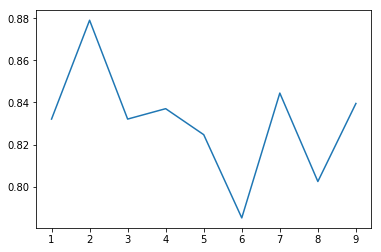

0.4 fraction hold out


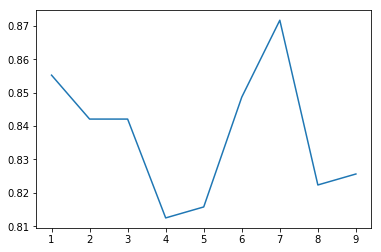

0.6 fraction hold out


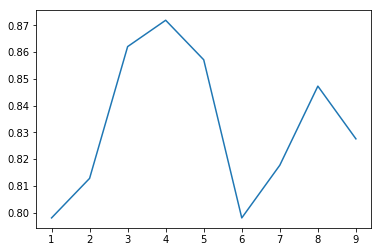

0.8 fraction hold out


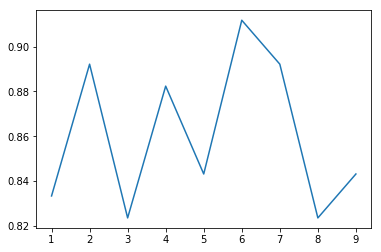

In [5]:
test_error = {'0.2': [], '0.4': [], '0.6': [], '0.8': []}

for depth in range(1, 10):
  decision_tree = tree.DecisionTreeClassifier(max_depth=depth)

  for hold_out in [0.2, 0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(boston.data, labels, test_size=1-hold_out)
    decision_tree = decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    error = accuracy_score(y_test, y_pred)
    test_error[str(hold_out)].append(error)

for k, v in test_error.items():
  print(k + ' fraction hold out')
  ax = plt.plot(range(1, 10), v)
  plt.show()